In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import sys

sys.path.insert(1, '..')
from check_data_consistency import DataConsistencyChecker

In [2]:
# This notebook provides some examples of patterns and discovered in datasets
# on OpenML. For most datasets, at least one pattern of some interest can usually
# be found. In some cases, we include two or more here, but we mostly stick to
# one to keep the size of the notebook down, because not all patterns found
# are interesting, some are similar to other patterns, and the number of patterns
# found that are interesting is quite large. 

# We limit each test to one example as well. 

In [3]:
def demo_test(filename, test_id_arr, issue_id_arr=None, features_arr=None):
    
    # Load the data
    data = fetch_openml(filename, version=1)
    df = pd.DataFrame(data.data, columns=data.feature_names)
    display(df.head())
    
    # Run DataConsistencyChecker with default parameters, other than verbose=0
    # to skip printing the test IDs as the tests exectute. 
    dc = DataConsistencyChecker(verbose=0)  
    dc.init_data(df)
    _ = dc.check_data_quality(execute_list=test_id_arr)
    
    # If specific issues are specified, list only these.
    if issue_id_arr is not None:
        dc.display_detailed_results(issue_id_list=issue_id_arr)
    elif features_arr is not None:
        dc.display_detailed_results(col_name_list=features_arr)
    else:
        dc.display_detailed_results(test_id_list=test_id_arr)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055



Data consistency check complete.
Analysed 4,177 rows, 8 columns
Executed 3 tests.

Patterns without Exceptions:
Found 2 patterns without exceptions
1 tests (33.33% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 12 patterns with exceptions
3 tests (100.00% of tests) flagged at least one exception each.
Flagged 39 row(s) with at least one exception.
Flagged 7 column(s) with at least one exception.
....................................................................................................


### LARGER

### Column(s): "Length" AND "Diameter"

**Issue ID**: 0

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: "Length" is consistently larger than "Diameter", with exceptions.

**Number of exceptions**: 1 (0.0239% of rows)

**Examples of values NOT flagged**:

,Length,Diameter
192,0.580,0.450
638,0.440,0.345
1082,0.435,0.345
1360,0.605,0.435
2202,0.570,0.405
2636,0.440,0.340
2802,0.650,0.520
3619,0.640,0.500
3767,0.555,0.460
4125,0.540,0.415


**Flagged values**:

,Length,Diameter
1210,0.185,0.375


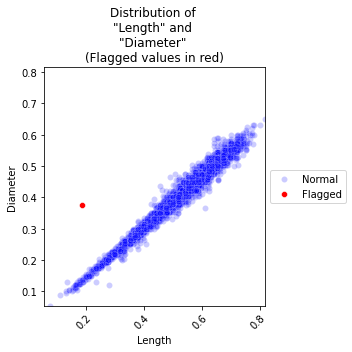

### Column(s): "Length" AND "Height"

**Issue ID**: 1

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: "Length" is consistently larger than "Height", with exceptions.

**Number of exceptions**: 1 (0.0239% of rows)

**Examples of values NOT flagged**:

,Length,Height
192,0.580,0.150
638,0.440,0.120
1082,0.435,0.115
1359,0.605,0.140
2202,0.570,0.160
2636,0.440,0.100
2802,0.650,0.155
3619,0.640,0.170
3767,0.555,0.160
4125,0.540,0.135


**Flagged values**:

,Length,Height
2051,0.455,1.13


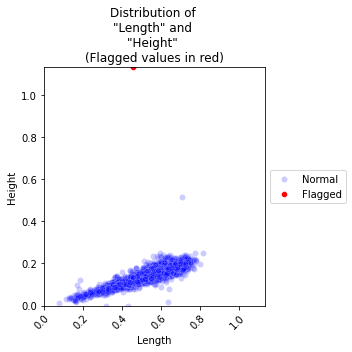

### Column(s): "Length" AND "Shell_weight"

**Issue ID**: 2

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: "Length" is consistently larger than "Shell_weight", with exceptions.

**Number of exceptions**: 15 (0.3591% of rows)

**Examples of values NOT flagged**:

,Length,Shell_weight
388,0.490,0.220
997,0.590,0.309
1374,0.615,0.300
1895,0.570,0.277
2176,0.570,0.405
2852,0.645,0.299
2889,0.520,0.160
3720,0.380,0.164
3769,0.560,0.245
3951,0.465,0.225


**Examples of flagged values**:

,Length,Shell_weight
81,0.620,0.675
129,0.710,0.780
163,0.725,1.005
164,0.650,0.815
166,0.725,0.850
168,0.705,0.760
277,0.610,0.690
891,0.730,0.897
2108,0.665,0.885
2157,0.620,0.725


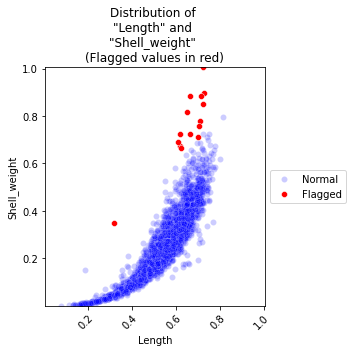

....................................................................................................


### SIMILAR_WRT_RATIO

### Column(s): "Length" AND "Diameter"

**Issue ID**: 8

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: "Length" and "Diameter" have consistently similar values in terms of their ratio, with exceptions.

**Number of exceptions**: 2 (0.0479% of rows)

**Examples of values NOT flagged**:

,Length,Diameter
192,0.580,0.450
638,0.440,0.345
1083,0.440,0.330
1361,0.605,0.475
1806,0.625,0.490
2056,0.475,0.380
2202,0.570,0.405
2659,0.550,0.440
2894,0.540,0.425
3548,0.495,0.370


**Flagged values**:

,Length,Diameter
898,0.280,0.120
1210,0.185,0.375


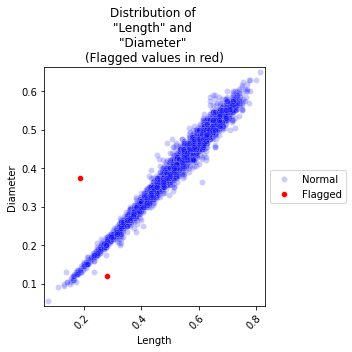

....................................................................................................


### LARGER_THAN_SUM

### Column(s): "Shucked_weight" AND "Viscera_weight" AND "Whole_weight"

**Issue ID**: 9

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The values in "Whole_weight" are consistently larger than the sum of "Shucked_weight",  and<br>"Viscera_weight", with exceptions.

**Number of exceptions**: 9 (0.2155% of rows)

**Examples of values NOT flagged**:

,Shucked_weight,Viscera_weight,Whole_weight,SUM
192,0.2760,0.1815,0.9270,0.4575
214,0.2475,0.1280,0.6600,0.3755
302,0.1065,0.0595,0.2520,0.1660
347,0.0800,0.0555,0.2000,0.1355
378,0.3895,0.1830,0.9950,0.5725
1222,0.0960,0.0405,0.2015,0.1365
2792,0.5175,0.3105,1.2050,0.8280
2844,0.5900,0.2470,1.1255,0.8370
3418,0.4945,0.2700,1.2495,0.7645
3917,0.4335,0.2260,1.0660,0.6595


**Flagged values**:

,Shucked_weight,Viscera_weight,Whole_weight,SUM
822,0.0860,0.0585,0.1375,0.1445
1216,0.4350,0.0150,0.1055,0.4500
1264,0.3580,0.0775,0.3720,0.4355
2114,0.0050,0.0065,0.0105,0.0115
2127,0.1060,0.0710,0.1270,0.1770
2171,0.0155,0.0150,0.0295,0.0305
2627,0.4950,0.0190,0.1055,0.5140
2641,0.2025,0.0875,0.1315,0.2900
3086,0.3045,0.0460,0.2040,0.3505


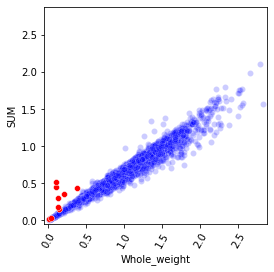

In [4]:
demo_test("abalone", test_id_arr=['LARGER', 'SIMILAR_WRT_RATIO', 'LARGER_THAN_SUM'], issue_id_arr=[9, 0, 1, 2, 8])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
0,2,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States
1,3,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States
2,2,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States
3,3,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States
4,1,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba



Data consistency check complete.
Analysed 48,842 rows, 14 columns
Executed 1 tests.

Patterns without Exceptions:
Found 0 patterns without exceptions
0 tests (0.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 47 patterns with exceptions
1 tests (100.00% of tests) flagged at least one exception each.
Flagged 1,551 row(s) with at least one exception.
Flagged 13 column(s) with at least one exception.



### Column(s): "education" AND "race" AND "fnlwgt"

**Issue ID**: 15

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: "fnlwgt" contains very large values given the values in "education" and "race".

**Number of exceptions**: 2 (0.0041% of rows)

**Examples of values NOT flagged**:

,education,race,fnlwgt
3646,HS-grad,White,343403.0
6674,Some-college,White,111128.0
21033,Prof-school,White,249686.0
34081,HS-grad,White,31137.0
37359,Bachelors,White,48634.0
37928,Bachelors,White,137900.0
38348,HS-grad,White,117719.0
42101,Doctorate,White,177927.0
46633,Some-college,White,309212.0
46775,Masters,White,47341.0


**Flagged values**:

,education,race,fnlwgt
40929,Bachelors,Asian-Pac-Islander,547108.0
41229,Masters,Asian-Pac-Islander,504423.0


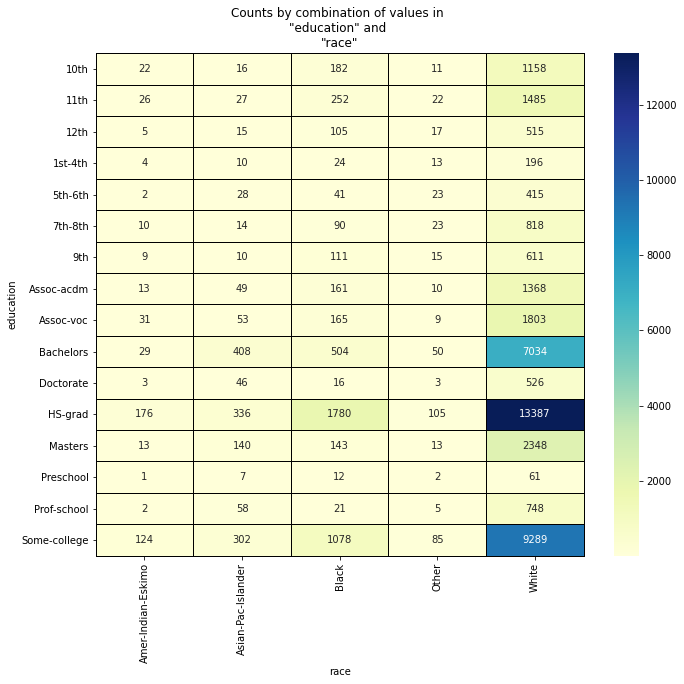

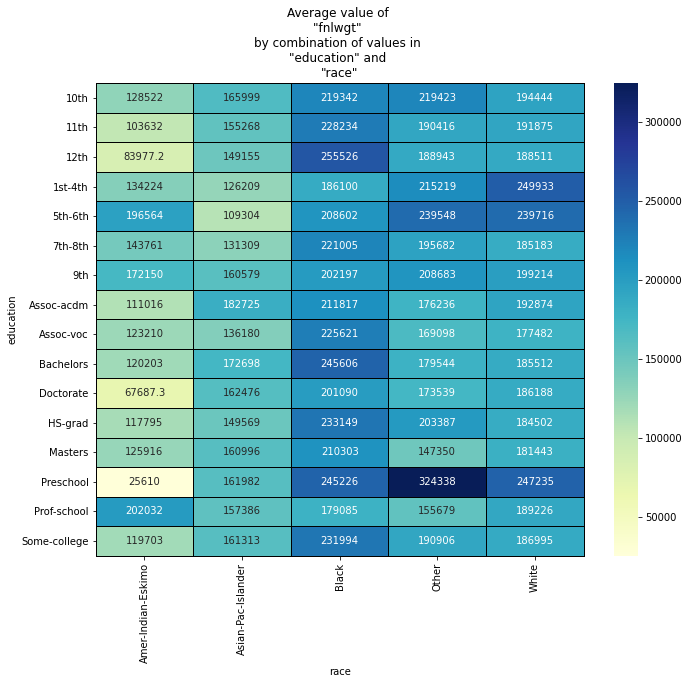

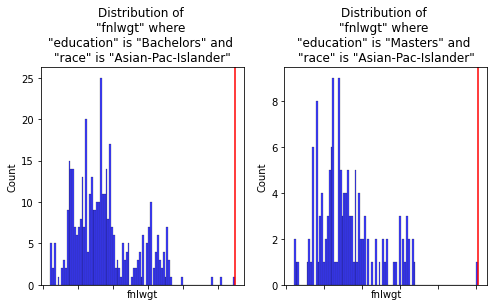

In [5]:
demo_test("adult", test_id_arr=['LARGE_GIVEN_PAIR'], issue_id_arr=[15])

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,jurofm,s,p,shape,thick,width,len,oil,bore,packing
0,NaN,C,A,8.0,0.0,NaN,S,NaN,0.0,NaN,...,NaN,NaN,NaN,COIL,0.700,610.0,0.0,NaN,0,NaN
1,NaN,C,R,0.0,0.0,NaN,S,2,0.0,NaN,...,NaN,NaN,NaN,COIL,3.200,610.0,0.0,NaN,0,NaN
2,NaN,C,R,0.0,0.0,NaN,S,2,0.0,NaN,...,NaN,NaN,NaN,SHEET,0.700,1300.0,762.0,NaN,0,NaN
3,NaN,C,A,0.0,60.0,T,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,COIL,2.801,385.1,0.0,NaN,0,NaN
4,NaN,C,A,0.0,60.0,T,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,SHEET,0.801,255.0,269.0,NaN,0,NaN



Data consistency check complete.
Analysed 898 rows, 31 columns
Executed 2 tests.

Patterns without Exceptions:
Found 2 patterns without exceptions
1 tests (50.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 3 patterns with exceptions
2 tests (100.00% of tests) flagged at least one exception each.
Flagged 5 row(s) with at least one exception.
Flagged 7 column(s) with at least one exception.
....................................................................................................


### NON_ZERO

### Column(s): width

**Issue ID**: 0

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The column consistently contains non-zero values, with exceptions.

**Number of exceptions**: 2 (0.2227% of rows)

**Examples of values NOT flagged**:

,width
31,1320.0
60,610.0
145,1250.0
505,609.0
506,1200.0
571,300.1
734,1525.0
807,1250.0
839,1220.0
848,610.0


**Flagged values**:

,width
606,0.0
845,0.0


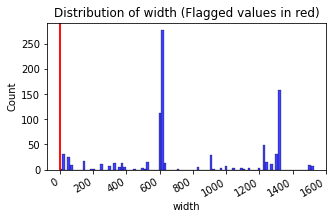

....................................................................................................


### DECISION_TREE_CLASSIFIER

### Column(s): "carbon" AND "hardness" AND "temper_rolling"

**Issue ID**: 1

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**:

The values in column "temper_rolling" are consistently predictable from ['carbon', 'hardness'] based using a decision tree with the following rules: 
|--- hardness <= 47.50
|   |--- carbon <= 1.50
|   |   |--- class: nan
|   |--- carbon >  1.50
|   |   |--- carbon <= 7.00
|   |   |   |--- class: T
|   |   |--- carbon >  7.00
|   |   |   |--- class: nan
|--- hardness >  47.50
|   |--- class: T
, with exceptions.


**Number of exceptions**: 2 (0.2227% of rows)

**Examples of values NOT flagged**:

,carbon,hardness,temper_rolling,PREDICTION
0,8.0,0.0,nan,nan
1,0.0,0.0,nan,nan
2,0.0,0.0,nan,nan
3,0.0,60.0,T,T
4,0.0,60.0,T,T
5,0.0,45.0,nan,nan
6,0.0,0.0,nan,nan
17,0.0,80.0,T,T
19,0.0,70.0,T,T
22,0.0,85.0,T,T


**Flagged values**:

,carbon,hardness,temper_rolling,PREDICTION
110,0.0,0.0,T,nan
585,0.0,0.0,T,nan


In [6]:
demo_test("anneal", test_id_arr=['NON_ZERO', 'DECISION_TREE_CLASSIFIER'], issue_id_arr=[0, 1])

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source
0,34.0,1,0,0,0,0,0,0,0,0,...,27.0,1,28.0,1,72.0,1,10.0,0,0,1
1,15.0,1,0,0,0,0,0,0,0,0,...,22.0,1,3.0,0,146.0,0,234.0,0,0,4
2,40.0,2,0,0,0,0,0,0,0,0,...,69.0,1,10.0,1,48.0,1,22.0,0,0,4
3,67.0,1,1,0,0,0,0,0,0,0,...,20.0,1,83.0,0,146.0,0,234.0,0,0,4
4,67.0,1,0,0,0,0,0,0,0,0,...,12.0,1,201.0,1,44.0,1,199.0,0,0,3



Data consistency check complete.
Analysed 3,772 rows, 27 columns
Executed 1 tests.

Patterns without Exceptions:
Found 0 patterns without exceptions
0 tests (0.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 1 patterns with exceptions
1 tests (100.00% of tests) flagged at least one exception each.
Flagged 2 row(s) with at least one exception.
Flagged 2 column(s) with at least one exception.



Displaying results for tests: 'SAME_VALUES'

### Column(s): "T4U_measured" AND "FTI_measured"

**Issue ID**: 0

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The values in "FTI_measured" are consistently the same as those in "T4U_measured", with exceptions.

**Number of exceptions**: 2 (0.0530% of rows)

**Examples of values NOT flagged**:

,T4U_measured,FTI_measured
501,1,1
1623,1,1
2104,1,1
2163,1,1
2710,1,1
2831,1,1
3086,1,1
3442,1,1
3602,1,1
3692,1,1


**Flagged values**:

,T4U_measured,FTI_measured
765,0,1
1515,0,1


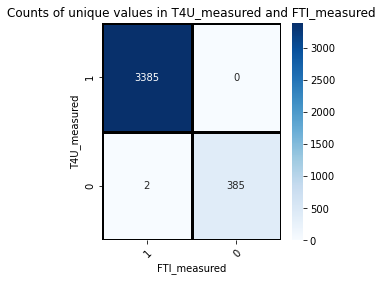

In [7]:
demo_test("allbp", test_id_arr=['SAME_VALUES'])

,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Strikeouts,Batting_average,On_base_pct,Slugging_pct,Fielding_ave,Position
0,23.0,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,2297.0,1402.0,1383.0,0.305,0.377,0.555,0.980,Outfield
1,13.0,1165.0,4019.0,378.0,1022.0,163.0,19.0,57.0,366.0,208.0,499.0,0.254,0.294,0.347,0.985,Second_base
2,13.0,1424.0,5557.0,844.0,1588.0,249.0,48.0,9.0,394.0,453.0,223.0,0.286,0.343,0.353,0.974,Second_base
3,14.0,1281.0,4019.0,591.0,1082.0,188.0,49.0,37.0,303.0,414.0,447.0,0.269,0.340,0.368,0.955,Third_base
4,17.0,1959.0,6606.0,823.0,1832.0,295.0,35.0,336.0,1122.0,594.0,1059.0,0.277,0.339,0.485,0.994,First_base



Data consistency check complete.
Analysed 1,340 rows, 16 columns
Executed 1 tests.

Patterns without Exceptions:
Found 1 patterns without exceptions
1 tests (100.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 0 patterns with exceptions
0 tests (0.00% of tests) flagged at least one exception each.
Flagged 0 column(s) with at least one exception.



Displaying results for tests: 'LINEAR_REGRESSION'

### Column(s): "Games_played" AND "At_bats" AND "Runs" AND "Doubles" AND "RBIs" AND "Hits"

Pattern found (without exceptions)

**Description**:

The column "Hits" contains values that are consistently predictable based on a linear regression formula: <br>-37.818 +  0.03 * "Games_played" +  0.19 * "At_bats" +  0.39 * "Runs" +  0.90 * "Doubles" +  0.15 * "RBIs" 

**Examples**:

,Games_played,At_bats,Runs,Doubles,RBIs,Hits,PREDICTION
233,1896.0,7349.0,1012.0,415.0,1125.0,2192.0,2154.601562
364,848.0,2316.0,220.0,95.0,293.0,545.0,541.176385
458,1511.0,5914.0,1405.0,313.0,625.0,1753.0,1897.705045
465,1106.0,3125.0,373.0,126.0,396.0,727.0,768.118850
574,1161.0,3906.0,421.0,128.0,394.0,991.0,985.381163
661,1495.0,4829.0,490.0,266.0,595.0,1311.0,1310.943940
760,1423.0,3443.0,302.0,79.0,252.0,748.0,758.471814
958,1163.0,4610.0,874.0,170.0,391.0,1212.0,1322.259718
1023,1064.0,2708.0,367.0,135.0,410.0,670.0,716.207252
1323,1920.0,6653.0,1105.0,285.0,964.0,1665.0,1741.347643


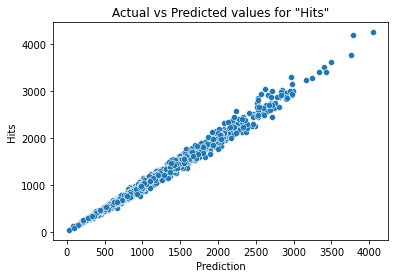

In [8]:
demo_test("baseball", test_id_arr=['LINEAR_REGRESSION'])

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown



Data consistency check complete.
Analysed 45,211 rows, 16 columns
Executed 1 tests.

Patterns without Exceptions:
Found 0 patterns without exceptions
0 tests (0.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 1 patterns with exceptions
1 tests (100.00% of tests) flagged at least one exception each.
Flagged 28 row(s) with at least one exception.
Flagged 1 column(s) with at least one exception.



Displaying results for tests: 'COLUMN_ORDERED_ASC'

### Column(s): V10

**Issue ID**: 0

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The column contains consistently ascending values, with exceptions.

**Number of exceptions**: 28 (0.0619% of rows)

**Examples of values NOT flagged (showing a consecutive set of rows)**:

,V10
42020,28.0
42021,28.0
42022,28.0
42023,28.0
42024,28.0
42025,28.0
42026,28.0
42027,28.0
42028,28.0
42029,28.0


**Examples of flagged values**:

,V10
7957,2.0
12443,1.0
18823,4.0
24038,17.0
24118,4.0
27716,4.0
28905,2.0
31201,2.0
31459,1.0
34177,4.0


Showing the first flagged example with the 5 rows before and 5 rows after (if available):

,V10
7952,30.0
7953,30.0
7954,30.0
7955,30.0
7956,30.0
7957,2.0
7958,2.0
7959,2.0
7960,2.0
7961,2.0


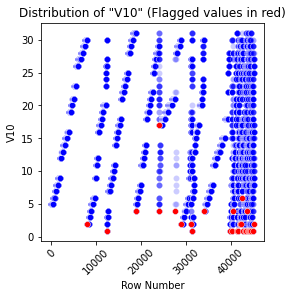

In [9]:
demo_test("bank-marketing", test_id_arr=['COLUMN_ORDERED_ASC'])

In [ ]:
demo_test("bioresponse", test_id_arr=['DECISION_TREE_REGRESSOR'])

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
demo_test("blood-transfusion-service-center", test_id_arr=['CONSTANT_RATIO', 'EVEN_MULTIPLE', 'LINEAR_REGRESSION'])

In [ ]:
demo_test("car-evaluation", test_id_arr=['GROUPED_STRINGS', 'PREV_VALUES_DT'])

In [ ]:
demo_test("car", test_id_arr=['PREV_VALUES_DT'])

In [ ]:
demo_test("cardiotocography", test_id_arr=['BINARY_IMPLIES', 'SAME_VALUES', 'SIMILAR_WRT_DIFF'])

In [ ]:
demo_test("Click_prediction_small", test_id_arr=['ROUNDING'], issue_id_arr=[3])

In [ ]:
demo_test("electricity", test_id_arr=['NON_ZERO'], issue_id_arr=[5])

In [ ]:
demo_test("eeg-eye-state", test_id_arr=['SIMILAR_PREVIOUS', 'SIMILAR_WRT_DIFF', 'CONSTANT_RATIO'], issue_id_arr=[81, 1, 28])

In [ ]:
demo_test("eucalyptus", test_id_arr=['GROUPED_STRINGS', 'CORRELATED_ALPHA_ORDER', 'POSITION_NON-ALPHANUMERIC'])

In [ ]:
demo_test("har", test_id_arr=['VERY_SMALL_ABS', 'ALL_POS_OR_ALL_NEG'], issue_id_arr=[0, 1])

In [ ]:
demo_test("hypothyroid", test_id_arr=['DECISION_TREE_CLASSIFIER', 'SAME_VALUES'])

In [ ]:
# combine cell below if works
demo_test("Isolet", test_id_arr=['BINARY_IMPLIES'])

In [ ]:
demo_test("Isolet", test_id_arr=['SMALL_GIVEN_VALUE'], issue_id_arr=[5])

In [ ]:
demo_test("JapaneseVowels", test_id_arr=['COLUMN_ORDERED_ASC'])

In [ ]:
demo_test("jm1", test_id_arr=['SIMILAR_TO_DIFF', 'SIMILAR_TO_PRODUCT']) 

In [ ]:
demo_test("jm1", test_id_arr=['RARE_DECIMALS', 'CORRELATED_FEATURES'], issue_id_arr=[1, 10, 11])

In [ ]:
demo_test("kc2", test_id_arr=['LINEAR_REGRESSION'])

In [ ]:
demo_test("musk", test_id_arr=['ALL_POS_OR_ALL_NEG', 'LARGE_GIVEN_PREFIX', 'LINEAR_REGRESSION'], issue_id_arr=[0, 3, 1])

In [ ]:
demo_test("madelon", test_id_arr=['LINEAR_REGRESSION'])

In [ ]:
demo_test("nomao", test_id_arr=['BINARY_MATCHES_SUM', 'BINARY_MATCHES_VALUES', 'SIMILAR_WRT_DIFF'], issue_id_arr=[20, 10, 6])

In [ ]:
demo_test("page-blocks", test_id_arr=['SIMILAR_TO_RATIO'])

In [ ]:
demo_test("pc1", test_id_arr=['SUM_OF_COLUMNS'])

In [ ]:
demo_test("profb", test_id_arr=['COLUMN_ORDERED_ASC'])

In [ ]:
demo_test("speeddating", test_id_arr=['CHARS_PATTERN'], features_arr=['d_d_age'])

In [ ]:
demo_test("steel-plates-fault", test_id_arr=['CONSTANT_RATIO'])

In [ ]:
demo_test("segment", test_id_arr=['ALL_POS_OR_ALL_NEG', 'NUMBER_DECIMALS'], issue_id_arr=[0, 1])

In [ ]:
demo_test("scene", test_id_arr=['BINARY_IMPLIES'], issue_id_arr=[0])

In [ ]:
demo_test("Spambase", test_id_arr=['SAME_VALUES'])

In [ ]:
demo_test("Soybean", test_id_arr=['MATCHED_MISSING', 'DECISION_TREE_CLASSIFIER'])

In [ ]:
demo_test("Vehicle", test_id_arr=['LINEAR_REGRESSION', 'SIMILAR_WRT_DIFF'])

In [ ]:
demo_test("vowel", test_id_arr=['GROUPED_STRINGS'])